<a href="https://colab.research.google.com/github/lim4373/study/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
cv2.__version__

'4.8.0'

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

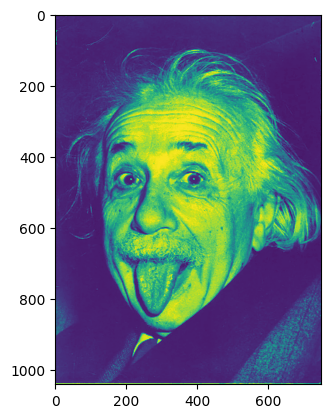

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/멀캠/Data/Albert Einstein.webp", cv2.IMREAD_GRAYSCALE)
plt.imshow(img2)

 Matplotlib등 대부분의 이미지 라이브러리는 RGB타입을 사용하기 때문에 BGR RGB타입으로 변경해주는 것이 좋다.
 * GRAY로 먼저 바꿔야 할듯

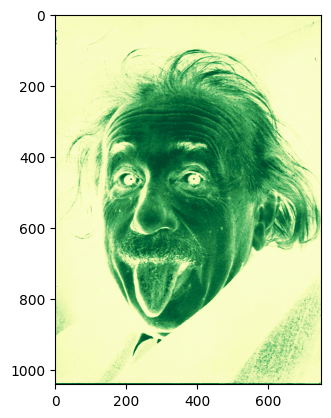

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/멀캠/Data/Albert Einstein.webp")
image_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(image_rgb, cmap='YlGn')

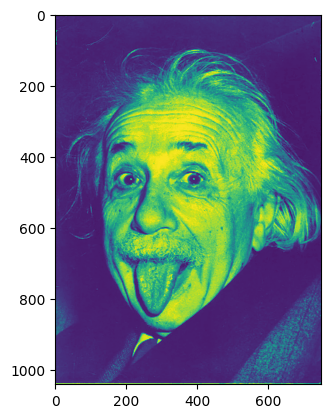

In [ ]:
dst = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# cv2_imshow(dst)
plt.imshow(dst)

In [ ]:
img_test = np.array(img2)
img_test

array([[[ 87,  87,  87],
        [ 70,  70,  70],
        [ 24,  24,  24],
        ...,
        [120, 120, 120],
        [200, 200, 200],
        [255, 255, 255]],

       [[ 84,  84,  84],
        [ 66,  66,  66],
        [ 21,  21,  21],
        ...,
        [113, 113, 113],
        [200, 200, 200],
        [255, 255, 255]],

       [[ 79,  79,  79],
        [ 62,  62,  62],
        [ 17,  17,  17],
        ...,
        [105, 105, 105],
        [200, 200, 200],
        [255, 255, 255]],

       ...,

       [[242, 242, 242],
        [254, 254, 254],
        [227, 227, 227],
        ...,
        [ 36,  36,  36],
        [ 56,  56,  56],
        [ 65,  65,  65]],

       [[243, 243, 243],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [158, 158, 158],
        [172, 172, 172],
        [193, 193, 193]],

       [[250, 250, 250],
        [249, 249, 249],
        [252, 251, 252],
        ...,
        [212, 212, 212],
        [228, 228, 228],
        [235, 235, 235]]

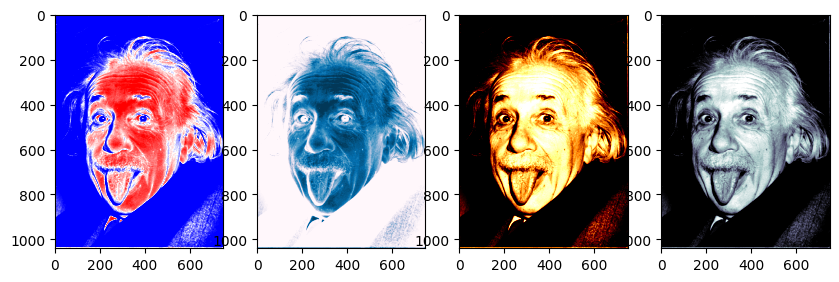

In [ ]:
Ae= cv2.imread("/content/drive/MyDrive/멀캠/Data/Albert Einstein.webp",  cv2.COLOR_BGR2GRAY)
dst1 = cv2.cvtColor(Ae, cv2.COLOR_BGR2GRAY)

max_value = np.percentile(img2, 99)
min_value = np.percentile(img2, 50)

plt.figure(figsize=(10,8))

plt.subplot(1,4,1)
plt.imshow(dst1,cmap="bwr", vmax = max_value, vmin = min_value)

plt.subplot(1,4,2)
plt.imshow(dst1,cmap='PuBu', vmax = max_value, vmin = min_value)


plt.subplot(1,4,3)
plt.imshow(dst1,cmap='afmhot', vmax = max_value, vmin = min_value)

plt.subplot(1,4,4)
plt.imshow(dst1,cmap='bone', vmax = max_value, vmin = min_value)

#### 3.이미지 저장

In [ ]:
image= cv2.imread("/content/drive/MyDrive/멀캠/Data/Albert Einstein.webp",cv2.IMREAD_GRAYSCALE)

cv2.imwrite("/content/drive/MyDrive/멀캠/Data/Albert Einstein_1.webp",image)

# plt.imshow(image, cmap='gray')

True

#### 4. 이미지 크기 변경

Text(0.5, 1.0, 'Resized image')

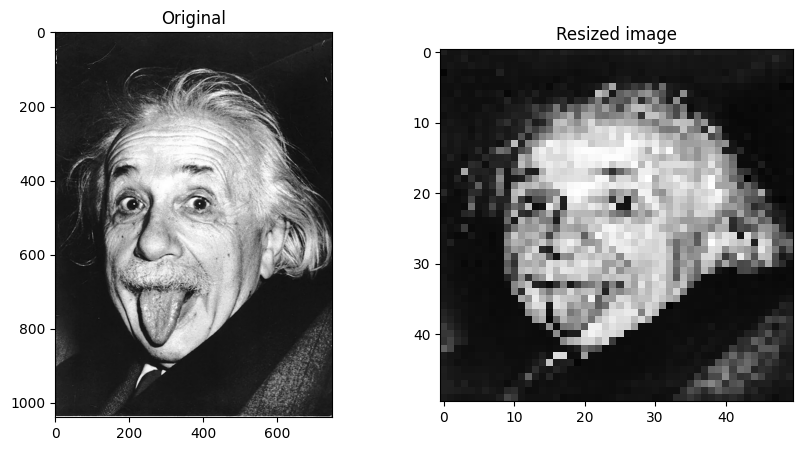

In [ ]:
dst_50 = cv2.resize(dst,(50,50))

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(dst, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(dst_50,cmap="gray")
ax[1].set_title("Resized image")

#### 5. 이미지 자르기

In [ ]:
dst.shape

(1040, 750)

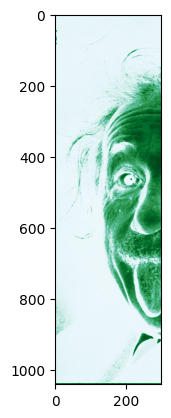

In [ ]:
dst_crop= dst[:,:300]
plt.imshow(dst_crop,cmap="BuGn")

#### 6.blur
* 주변 픽셀의 평균값으로 변환하고, 주변 픽셀에 수행되는 연산을 커널이라고 한다.

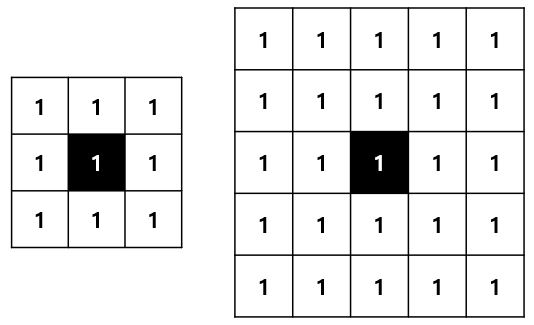

In [ ]:
dst_blurry1 = cv2.blur(dst,(5,5))

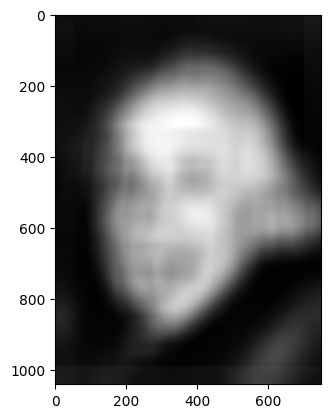

In [ ]:
dst_blurry = cv2.blur(dst,(100,100)) # (5,5)커널 평균 값 -> 커널이 클수록 이미지가 더 부드러워진다.
plt.imshow(dst_blurry,cmap="gray")

Text(0.5, 1.0, 'blur=100,100')

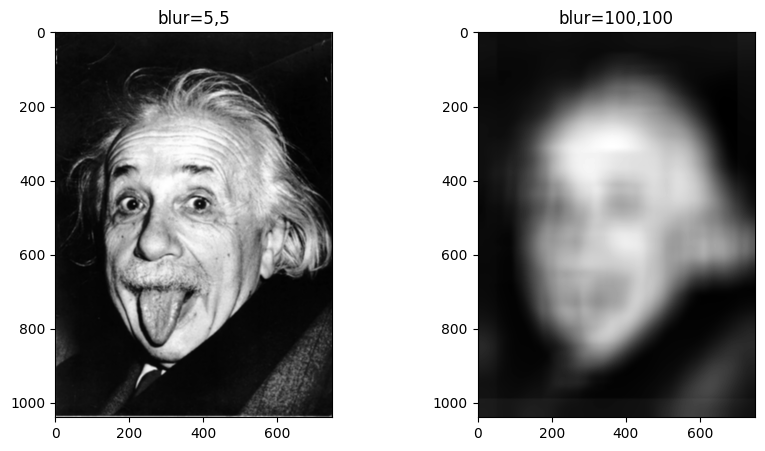

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(dst_blurry1, cmap="gray")
ax[0].set_title("blur=5,5")
ax[1].imshow(dst_blurry,cmap="gray")
ax[1].set_title("blur=100,100")

#### filter2D

In [ ]:
kernel = np.ones((10,10))/25.0 # -> 모두 더하면 1이 되도록 정규화
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]])

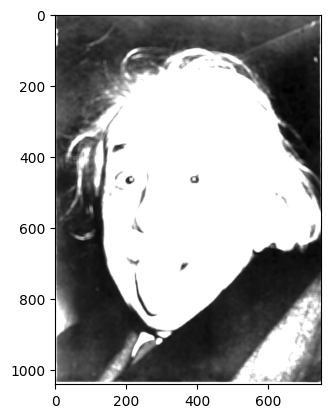

In [ ]:
dst_kernel = cv2.filter2D(dst,-1,kernel)
plt.imshow(dst_kernel,cmap="gray")

#### GaussianBlur 가우시안 불러
*  GaussianBlur() 함수의 세 번째 매개변수는 X축(너비) 방향의 표준편차이며,
* 0으로 지정하면 ((너비-1)0.5-1)0.3+0.8 이다

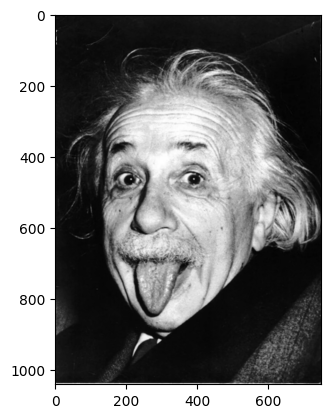

In [ ]:
dst_gaussian = cv2.GaussianBlur(dst,(5,5),0)
plt.imshow(dst_gaussian, cmap="gray")

Text(0.5, 1.0, 'GaussianBlur')

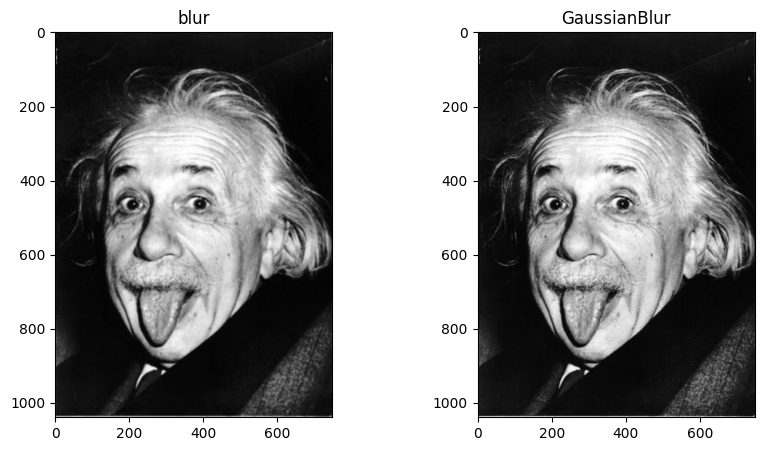

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(dst_blurry1, cmap="gray")
ax[0].set_title("blur")
ax[1].imshow(dst_gaussian, cmap="gray")
ax[1].set_title("GaussianBlur")

#### 7. 이미지 선명하게 표현

Text(0.5, 1.0, 'dst_sharp')

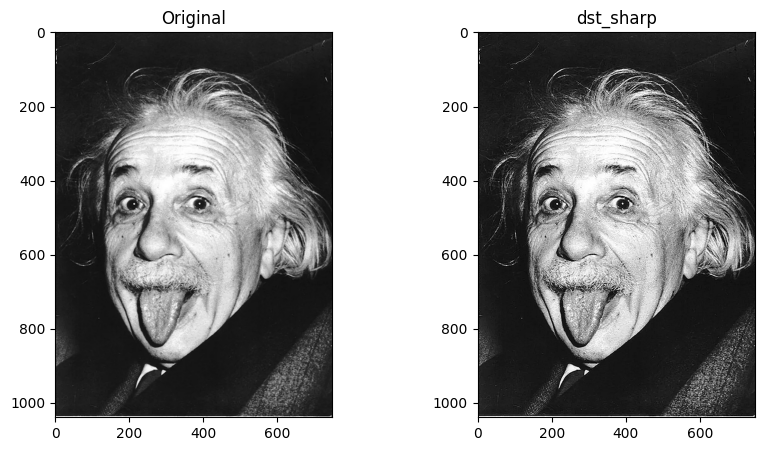

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용
dst_sharp =cv2.filter2D(dst,-1,kernel)
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(dst, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(dst_sharp, cmap="gray")
ax[1].set_title("dst_sharp")

#### 8. 이미지 대비 높이기
* 히스토그램 평활화(Histogram Equalization)은 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구이며
* OpenCV에서는 equalizeHist() 메소드를 통해 적용할 수 있다.

Text(0.5, 1.0, 'Enhanced Image')

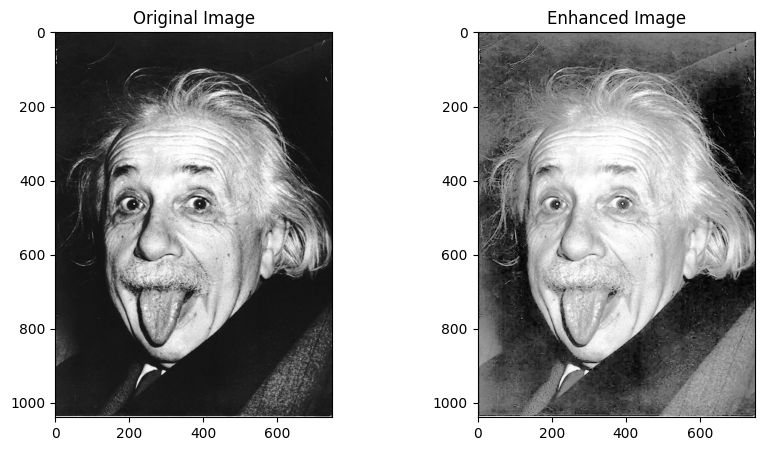

In [ ]:
# 이미지 대비를 향상
dst_enhanced = cv2.equalizeHist(dst)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(dst, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(dst_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

* 컬러 이미지의 경우 먼저 YUV 컬러 포맷으로 변환해야 한다.
*  Y는 루마 또는 밝기이고 U와 V는 컬러를 나타낸다. 변환한 뒤에 위와 동일하게 equlizeHist() 메소드를 적용하고 다시 RGB 포맷으로 변환 후 출력한다.

Text(0.5, 1.0, 'Enhanced Color Image')

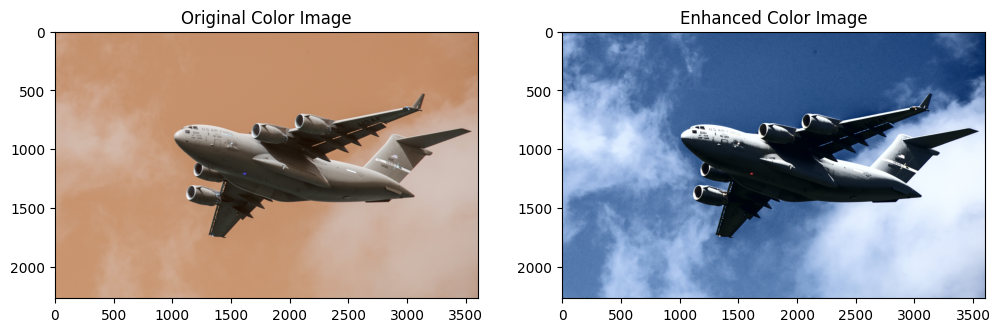

In [ ]:
image_bgr = cv2.imread('/content/drive/MyDrive/멀캠/Data/plane2.jpg')
# YUV 컬로 포맷으로 변환
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# #RGB로 변환
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(image_bgr, cmap='gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

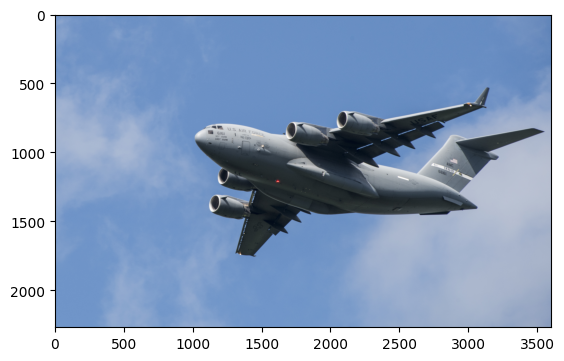

In [ ]:
image_rgb1 = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb1)

#### 9. 이미지 이진화
* 이미지 이진화(임계처리)는 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정이다.
* 더 고급 기술은 적응적 이진화(Adaptive Thresholding)로, 픽셀의 임곗값이 주변 픽셀의 강도에 의해 결정된다.
* 이는 이미지 안의 영역마다 빛 조건이 달라질 때 도움이 된다

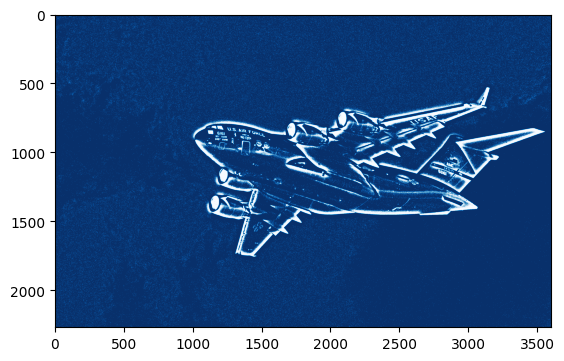

In [ ]:
# 이미지 로드
image_grey = cv2.imread('/content/drive/MyDrive/멀캠/Data/plane2.jpg', cv2.IMREAD_GRAYSCALE)

image_grey1 = cv2.imread('/content/drive/MyDrive/멀캠/Data/plane.jpg', cv2.IMREAD_GRAYSCALE)
# Adaptive Thresholding 적용
max_output_value = 255   # 출력 픽셀 강도의 최대값
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

# adaptiveThreshold() 함수에는 네 개의 중요한 매개변수가 있다.

#max_output_value : 출력 픽셀 강도의 최댓값 저장
#cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정. 가중치는 가우시안 윈도우에 의해 결정
#cv2.ADAPTIVE_THRESH_MEAN_C : 주변 픽셀의 평균을 임곗값으로 설정


plt.imshow(image_binarized, cmap='Blues')
plt.show()

#### 10. 배경 제거
* 배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 그랩컷(grabCut) 알고리즘을 적용하여 배경을 제거한다.

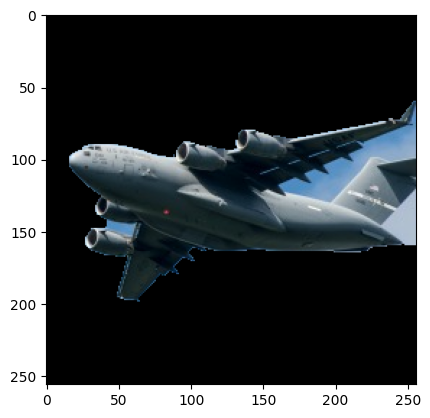

In [ ]:
image_bgr = cv2.imread('/content/drive/MyDrive/멀캠/Data/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

Text(0.5, 1.0, 'mask_2')

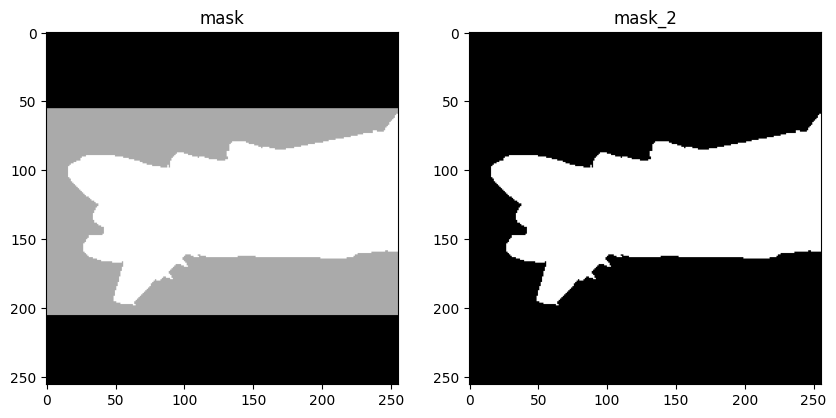

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(mask,cmap="gray")
ax[0].set_title("mask")
ax[1].imshow(mask_2,cmap="gray")
ax[1].set_title("mask_2")

11. 경계선 감지

* Canny()메소드를 활용하여 경계선을 감지 할 수 있다.
* Canny()메소드는 그래디언트 임곗값 사이의 저점과 고점을 나타내는 두 매개변수를 필요로 하며, 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주하고, 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주한다.

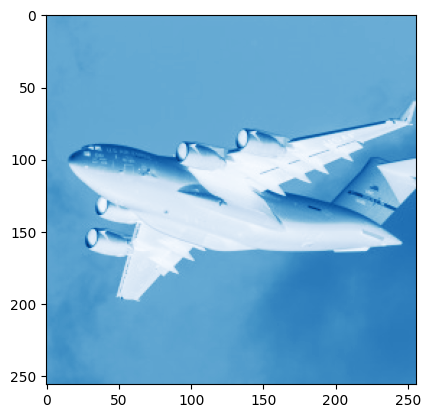

In [ ]:
image_gray = cv2.imread("/content/drive/MyDrive/멀캠/Data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap="Blues")

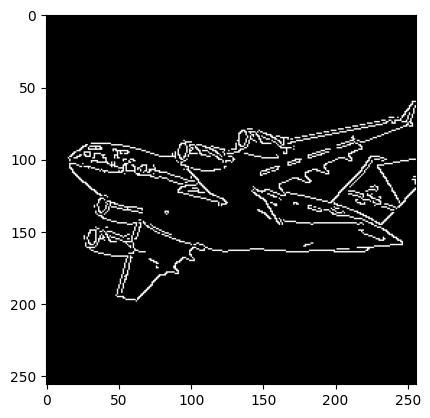

In [ ]:
# 이미지 로드
image_gray = cv2.imread("/content/drive/MyDrive/멀캠/Data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

### 크리스마스 트리....

In [ ]:
for i in range(10):
  print(i*"*", end= "\n")

print("| |")
print("| |")
print("| |")
print("| |")
print("| |")


*
**
***
****
*****
******
*******
********
*********
| |
| |
| |
| |
| |
